In [334]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Set plot style
#sns.set(style="whitegrid")


In [335]:
# Load the dataset
data = pd.read_csv(r'D:\git_project\Predicting-Train-Delay-and-its-reasons\railway.csv')

# Display the first few rows of the dataframe
data.head()
df = data.copy()

In [336]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [337]:
#Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

* The data type of Date of Purchase , Time of Purchase,  Date of Journey, Departure Time, Arrival Time and Actual Arrival time is not correct. We need to change the data type of these variables.


In [338]:
# Convert date and time fields to datetime objects
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Time of Purchase'] = pd.to_datetime(df['Time of Purchase']).dt.time
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
df['Departure Time'] = pd.to_datetime(df['Departure Time']).dt.time
df['Arrival Time'] = pd.to_datetime(df['Arrival Time']).dt.time
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time']).dt.time

In [339]:
# Check for missing values
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [340]:
# Fill missing values in 'Reason for Delay' with 'No Delay' for non-delayed journeys
df['Reason for Delay'].fillna('No Delay', inplace=True)


In [341]:
# Feature Engineering
df['Day of Week'] = df['Date of Journey'].dt.dayofweek
df['Month'] = df['Date of Journey'].dt.month
df['Is Weekend'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)
df['Purchase Hour'] = pd.to_datetime(df['Time of Purchase'], format='%H:%M:%S').dt.hour
df['Departure Hour'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.hour

In [342]:
#to see all the rows
pd.set_option('display.max_columns', None)

In [343]:
#distribution of different journey status
df['Journey Status'].value_counts()


On Time      27481
Delayed       2292
Cancelled     1880
Name: Journey Status, dtype: int64

* We don't have Actual Arrival Time for those rides which are Cancelled. This is OK.

In [344]:
#categorical & numerical variables
categorical_features = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 'Ticket Type', 'Departure Station', 'Arrival Destination']
numerical_features = ['Price', 'Day of Week', 'Month', 'Is Weekend', 'Purchase Hour', 'Departure Hour']


In [345]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

### Exploratory Data Analysis


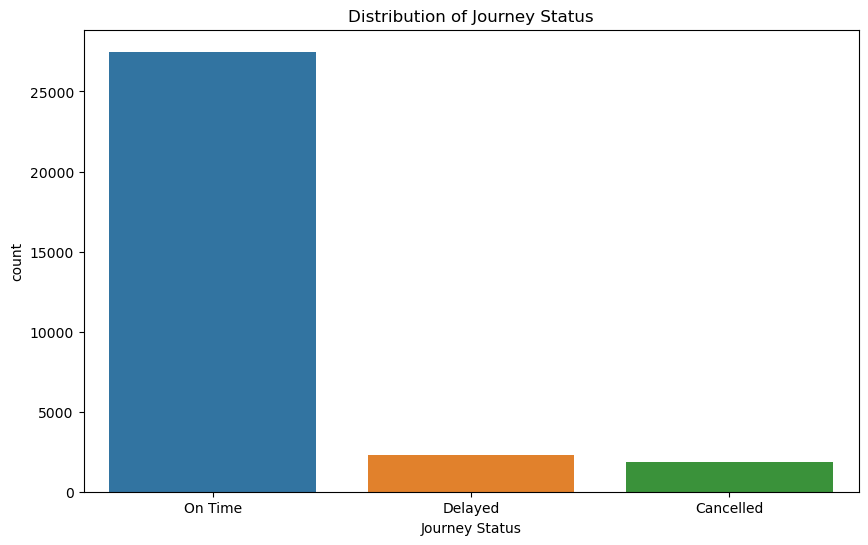

In [346]:
# Distribution of Journey Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Journey Status')
plt.title('Distribution of Journey Status')
plt.show()

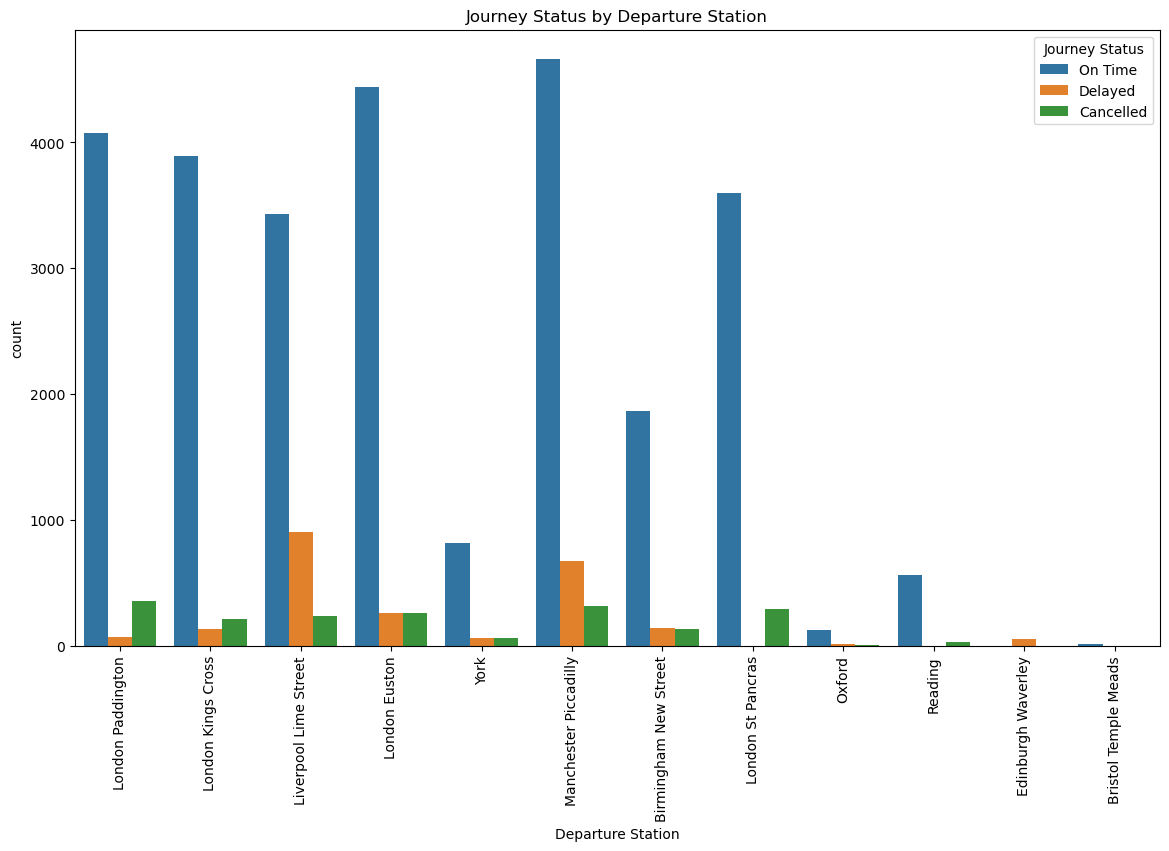

In [347]:
# Journey status by departure station
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Departure Station', hue='Journey Status')
plt.title('Journey Status by Departure Station')
plt.xticks(rotation=90)
plt.show()

* Most of the trains are cancelled by departuring from stations 'Liverpool Lime Street', 'Manchester Piccadility'.
* Most of the trains are being cancelled by departuring from London Paddington, London St Pancras and Manchester Piccadility.

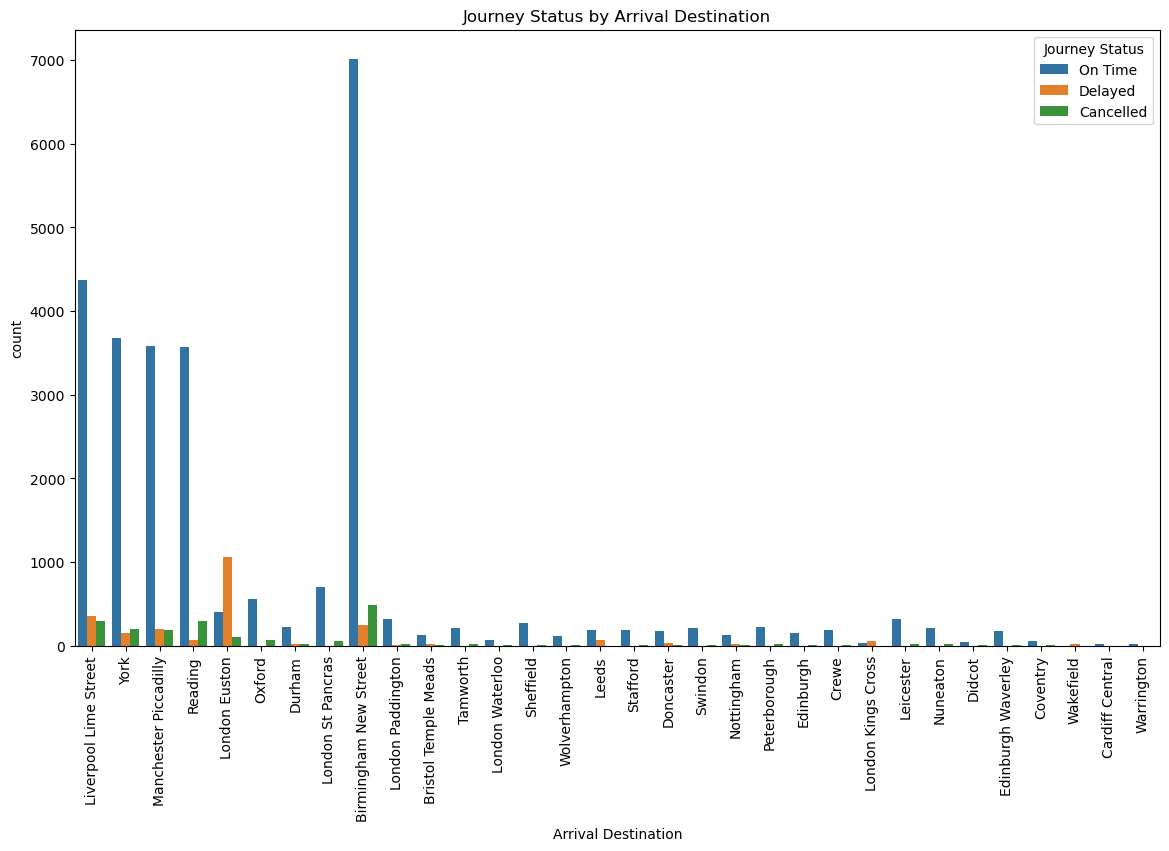

In [348]:
# Journey status by arrival destination
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Arrival Destination', hue='Journey Status')
plt.title('Journey Status by Arrival Destination')
plt.xticks(rotation=90)
plt.show()

* Most of the train arriving at London Euston are delayed.

In [349]:
# Common Reasons for Delays
df['Reason for Delay'].value_counts()

No Delay              27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: Reason for Delay, dtype: int64

In [350]:
# Standardizing the 'Reason for Delay' column
df['Reason for Delay'] = df['Reason for Delay'].str.strip().str.lower()

In [351]:
df['Reason for Delay'].value_counts()

no delay              27481
weather                 995
signal failure          970
technical issue         707
staffing                410
staff shortage          399
weather conditions      377
traffic                 314
Name: Reason for Delay, dtype: int64

In [352]:
# Standardizing the 'Reason for Delay' column
df['Reason for Delay'] = df['Reason for Delay'].str.strip().str.lower()

# Mapping common reasons for delays to a standardized set of values
reason_mapping = {
    'staff shortage': 'staffing',
    'weather conditions': 'weather'
}

df['Reason for Delay'] = df['Reason for Delay'].map(reason_mapping).fillna(df['Reason for Delay'])

# Verify the changes
print(df['Reason for Delay'].value_counts())


no delay           27481
weather             1372
signal failure       970
staffing             809
technical issue      707
traffic              314
Name: Reason for Delay, dtype: int64


In [353]:

# Filter for delayed journeys
delayed_data = df[df['Journey Status'] == 'Delayed']

In [354]:
delayed_data

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Day of Week,Month,Is Weekend,Purchase Hour,Departure Hour
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,signal failure,No,0,1,0,11,9
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,None,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,signal failure,No,0,1,0,1,0
20,8dfbf0fc-aea0-424f-b30e,2023-12-31,11:57:15,Station,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01,11:15:00,12:35:00,13:06:00,Delayed,technical issue,Yes,0,1,0,11,11
26,74462231-5241-46f4-8328,2023-12-31,15:53:46,Online,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01,14:15:00,15:30:00,15:54:00,Delayed,signal failure,Yes,0,1,0,15,14
45,767314a0-f839-4607-a3d3,2024-01-01,05:09:30,Station,Credit Card,None,First Class,Advance,134,Manchester Piccadilly,London Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,weather,No,1,1,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,cdade72b-55dd-4ff3-9f1e,2024-04-30,06:41:06,Station,Credit Card,None,Standard,Anytime,151,Liverpool Lime Street,London Euston,2024-04-30,08:00:00,10:15:00,11:04:00,Delayed,weather,No,1,4,0,6,8
31594,d30c639f-2763-47f3-bdc5,2024-04-30,09:35:38,Station,Contactless,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,11:00:00,11:30:00,14:19:00,Delayed,staffing,No,1,4,0,9,11
31597,e5f2a2e5-21e4-420f-9b83,2024-04-30,09:43:56,Station,Contactless,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,11:00:00,11:30:00,14:19:00,Delayed,staffing,No,1,4,0,9,11
31599,4212c6cc-921e-4a5e-86dd,2024-04-30,10:41:47,Station,Debit Card,Adult,Standard,Off-Peak,11,Birmingham New Street,Manchester Piccadilly,2024-04-30,11:15:00,12:35:00,12:49:00,Delayed,technical issue,Yes,1,4,0,10,11


In [355]:
#Filtering the cancelled train data
cancelled_data = df[df['Journey Status']=='Cancelled']

In [356]:
cancelled_data

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Day of Week,Month,Is Weekend,Purchase Hour,Departure Hour
39,69eaff73-ca3a-4831-905b,2024-01-01,03:52:29,Online,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaT,Cancelled,technical issue,No,1,1,0,3,2
75,a88f097f-bda3-4394-9c7d,2024-01-01,17:43:02,Station,Debit Card,Disabled,First Class,Advance,35,London Euston,Birmingham New Street,2024-01-02,16:00:00,17:20:00,NaT,Cancelled,technical issue,No,1,1,0,17,16
91,8a66ead7-e381-4311-b667,2024-01-02,00:54:33,Online,Credit Card,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaT,Cancelled,technical issue,Yes,1,1,0,0,2
111,d618c56f-3512-484d-9876,2024-01-02,03:33:32,Station,Credit Card,None,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-01-02,05:00:00,06:20:00,NaT,Cancelled,staffing,Yes,1,1,0,3,5
148,eace2ada-5294-47e6-b4b8,2024-01-02,06:33:00,Station,Credit Card,None,First Class,Anytime,235,Liverpool Lime Street,London Euston,2024-01-02,08:00:00,10:15:00,NaT,Cancelled,staffing,No,1,1,0,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31639,465e3643-fb67-4deb-8ec9,2024-04-30,17:13:32,Station,Debit Card,Senior,First Class,Anytime,144,London Euston,Manchester Piccadilly,2024-04-30,18:45:00,20:35:00,NaT,Cancelled,signal failure,No,1,4,0,17,18
31641,2e96cde6-50c1-4311-8089,2024-04-30,17:16:04,Station,Credit Card,Adult,Standard,Anytime,95,London Euston,Manchester Piccadilly,2024-04-30,18:45:00,20:35:00,NaT,Cancelled,signal failure,Yes,1,4,0,17,18
31642,09e207d9-db49-4ec0-9c4f,2024-04-30,17:21:14,Online,Contactless,None,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,18:45:00,19:15:00,NaT,Cancelled,weather,No,1,4,0,17,18
31644,1eacd955-f539-4c79-adb6,2024-04-30,17:26:33,Online,Credit Card,None,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-04-30,18:45:00,20:05:00,NaT,Cancelled,signal failure,No,1,4,0,17,18


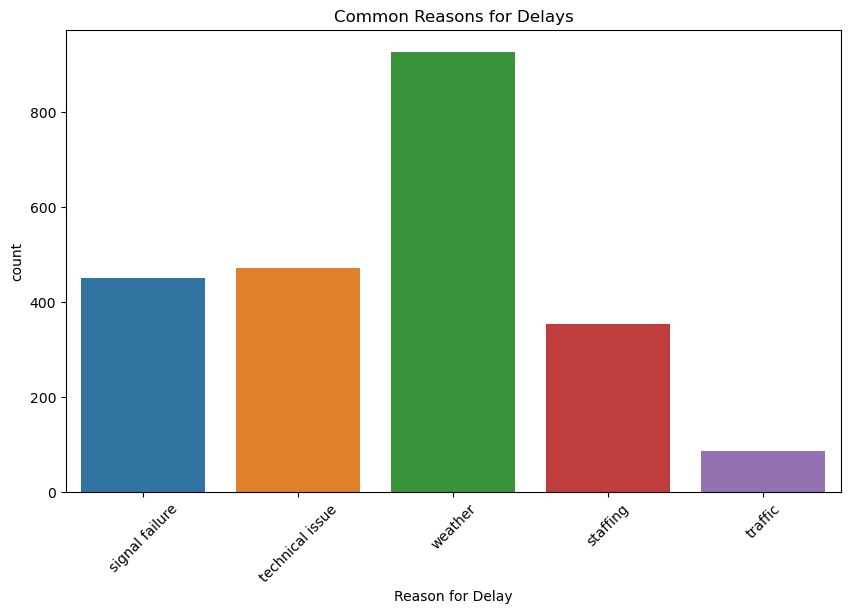

In [357]:
# Count plot of delay reasons
plt.figure(figsize=(10, 6))
sns.countplot(data=delayed_data, x='Reason for Delay')
plt.title('Common Reasons for Delays')
plt.xticks(rotation=45)
plt.show()


* Weather is the primary reason for the delay of the trains.

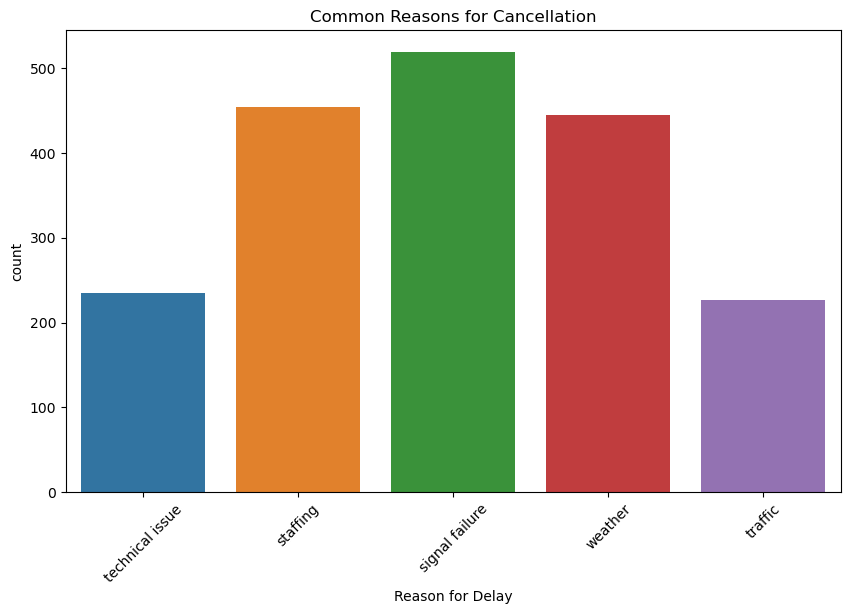

In [358]:
# Count plot of cancellation reasons
plt.figure(figsize=(10, 6))
sns.countplot(data=cancelled_data, x='Reason for Delay')
plt.title('Common Reasons for Cancellation')
plt.xticks(rotation=45)
plt.show()

* The most primary reasons for the cancellation of trains are Staffing, signal failure, weather

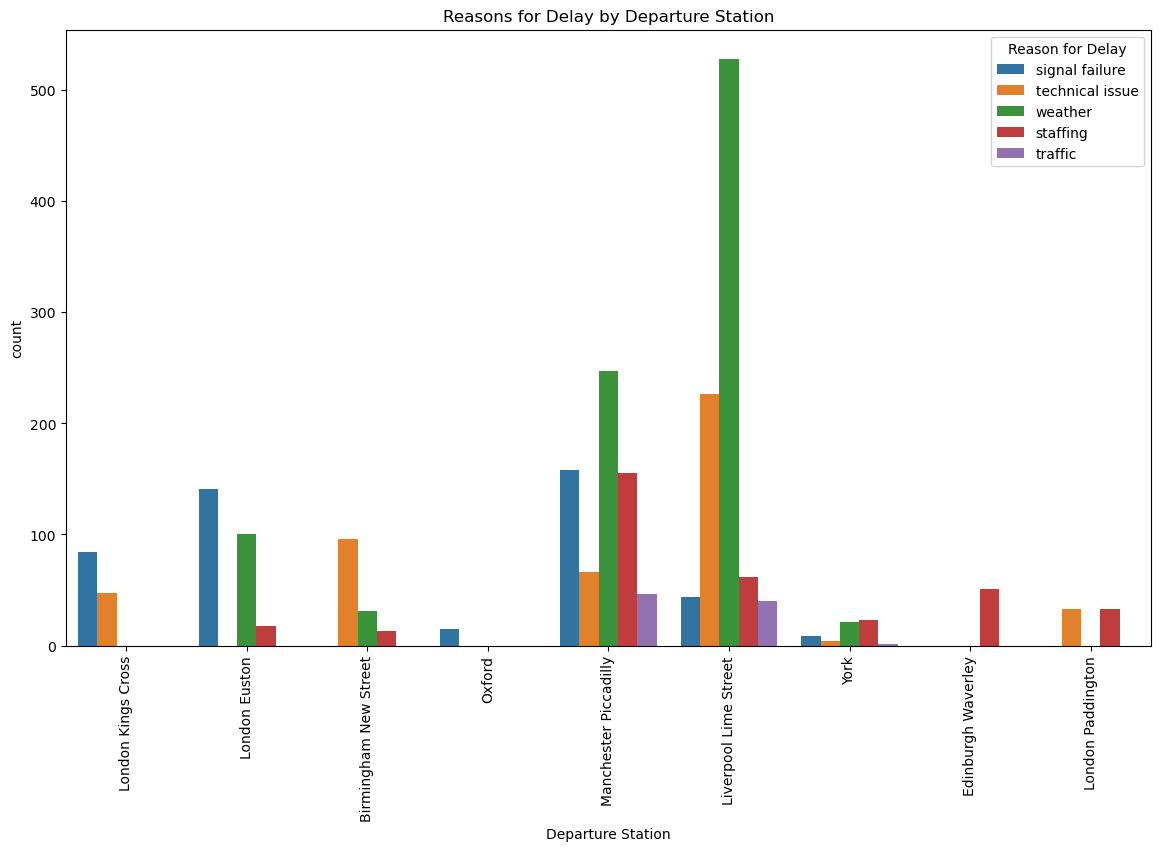

In [359]:
# Delay reasons by departure station
plt.figure(figsize=(14, 8))
sns.countplot(data=delayed_data, x='Departure Station', hue='Reason for Delay')
plt.title('Reasons for Delay by Departure Station')
plt.xticks(rotation=90)
plt.show()

* Most of the reasons for delay for LiverPool and Manchester is Weather.


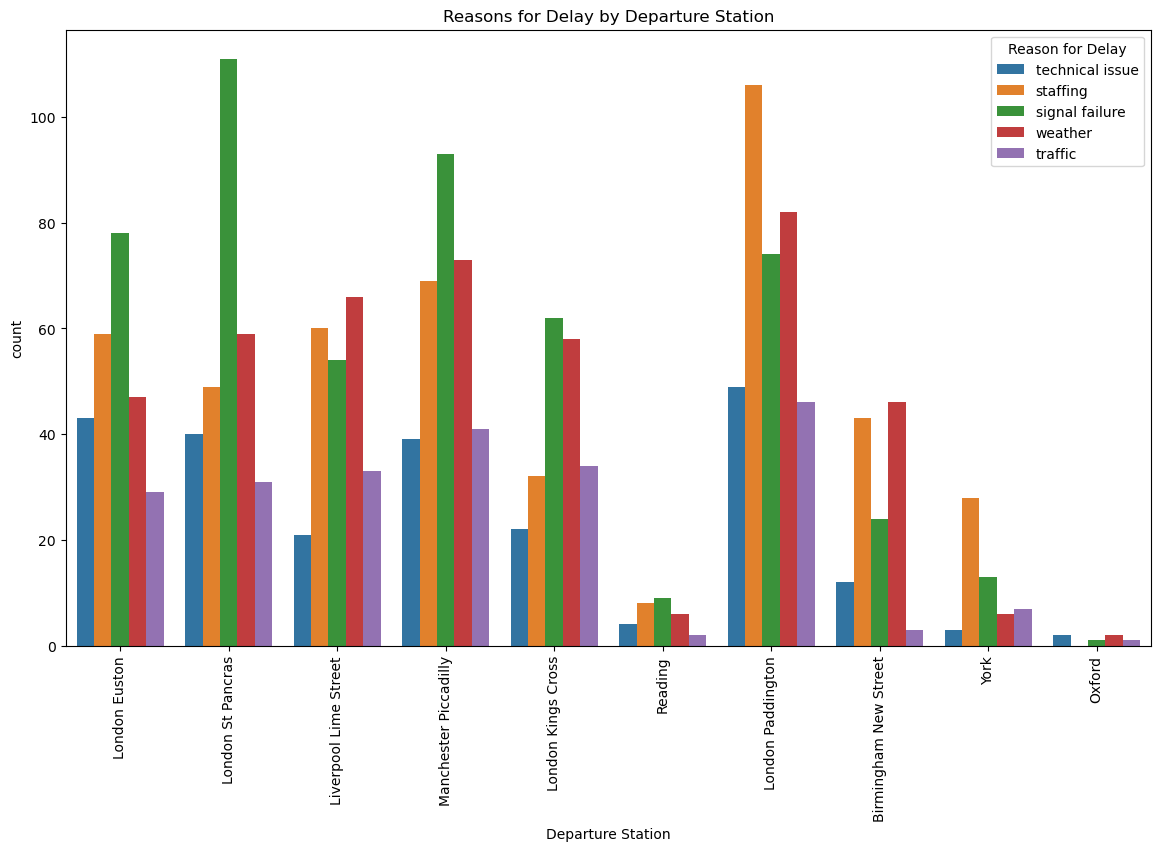

In [360]:
# Delay reasons by departure station
plt.figure(figsize=(14, 8))
sns.countplot(data=cancelled_data, x='Departure Station', hue='Reason for Delay')
plt.title('Reasons for Delay by Departure Station')
plt.xticks(rotation=90)
plt.show()

* Most of the departure stations has the issue of staffing and signal failure.

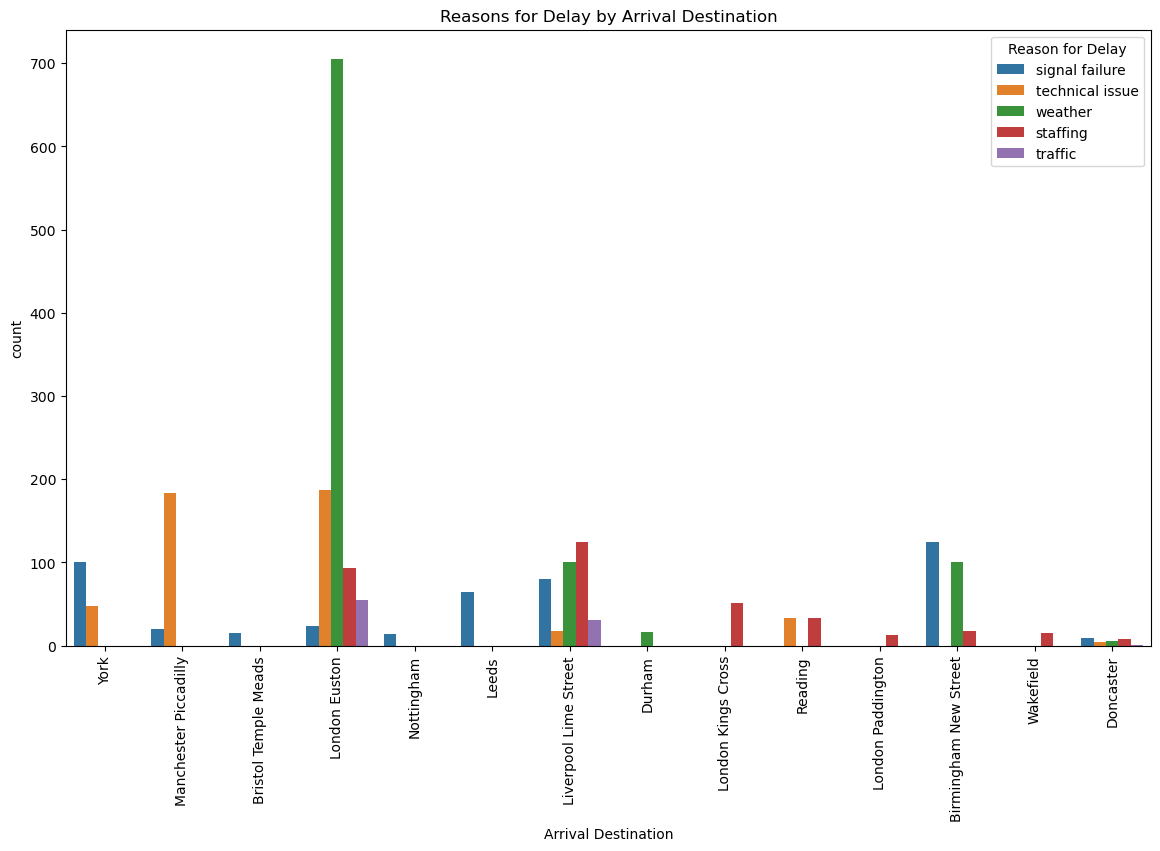

In [361]:
# Delay reasons by arrival destination
plt.figure(figsize=(14, 8))
sns.countplot(data=delayed_data, x='Arrival Destination', hue='Reason for Delay')
plt.title('Reasons for Delay by Arrival Destination')
plt.xticks(rotation=90)
plt.show()

* Weather is the reason for delay at the arrival station - London Euston.
* Technical issue is the reason for delay at the arrival station - Manchester Piccadility

In [362]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Day of Week,Month,Is Weekend,Purchase Hour,Departure Hour
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,no delay,No,0,1,0,12,11
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,signal failure,No,0,1,0,11,9
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,no delay,No,1,1,0,19,18
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,no delay,No,0,1,0,23,21
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,no delay,No,0,1,0,18,16
